In [1]:
import numpy as np
import pandas as pd	
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', header=None)


In [4]:
df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


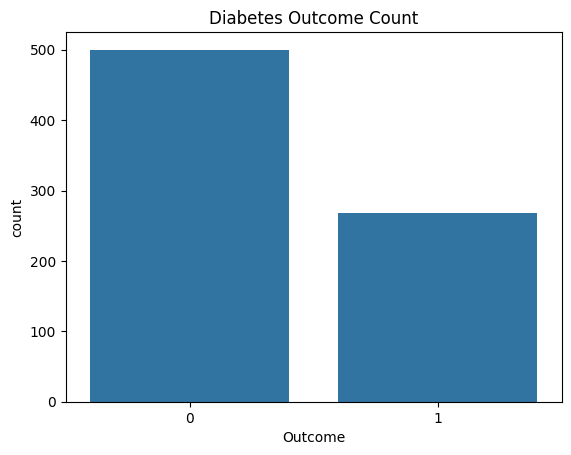

In [8]:
sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Outcome Count")
plt.show()

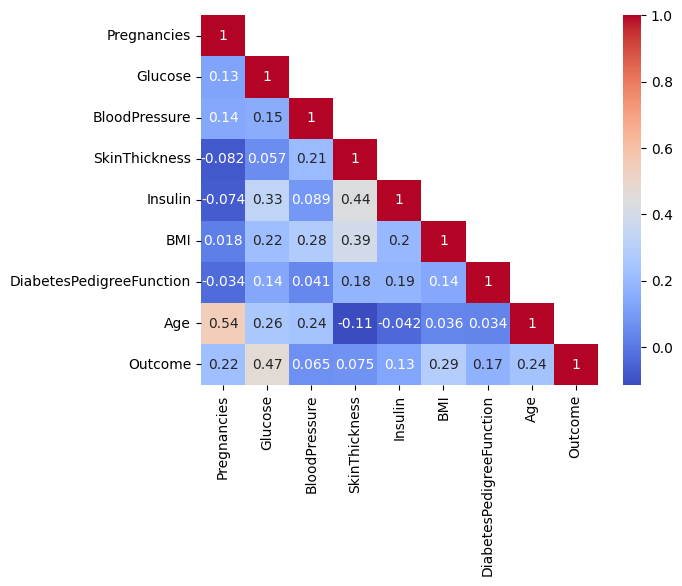

In [9]:
mask = np.triu(np.ones_like(df.corr()), k=1)
plt.Figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, mask=mask, cmap='coolwarm')
plt.show()

In [10]:
df.apply(lambda x: x == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Replacing 0 of Gluclose, BP, SkinThickness, BMI with median value

In [11]:
col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in col:
	df[col] = df[col].replace(0, df[col].median())

In [12]:
df.apply(lambda x: x == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [13]:
X = df.drop('Outcome', axis=1)
Y = df['Outcome']

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [16]:
y_pred = model.predict(X_test)

In [17]:
print("Accuracy Score : ", accuracy_score(Y_test, y_pred))
print("Confusion Matrix : \n", confusion_matrix(Y_test, y_pred))

Accuracy Score :  0.7597402597402597
Confusion Matrix : 
 [[82 17]
 [20 35]]


In [18]:
print("Classification report : \n", classification_report(Y_test, y_pred))

Classification report : 
               precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



In [19]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
coeff_df.sort_values(by='Coefficient', key=abs, ascending=False)


,Feature,Coefficient
6,DiabetesPedigreeFunction,0.590287
5,BMI,0.106046
0,Pregnancies,0.066207
1,Glucose,0.038540
7,Age,0.033338
2,BloodPressure,-0.014480
3,SkinThickness,0.005404
4,Insulin,-0.002191


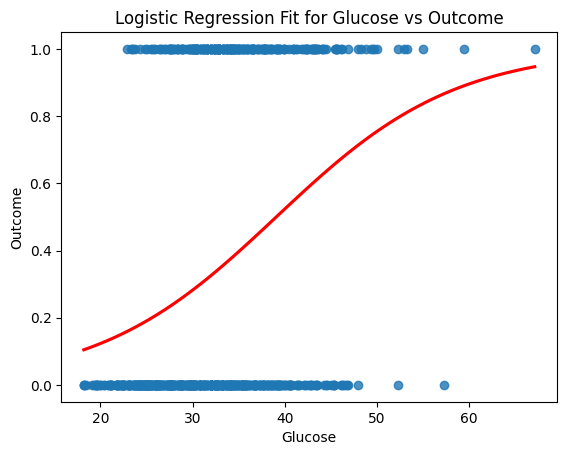

In [20]:
plt.Figure(figsize=(6, 6))
sns.regplot(x=X['BMI'], y=Y, logistic=True, ci=None, line_kws={"color": "red"})
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.title('Logistic Regression Fit for Glucose vs Outcome')
plt.show()

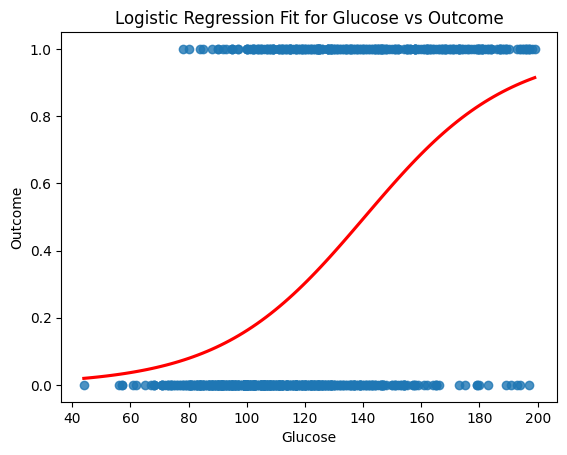

In [21]:
plt.Figure(figsize=(6, 6))
sns.regplot(x=X['Glucose'], y=Y, logistic=True, ci=None, line_kws={"color": "red"})
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.title('Logistic Regression Fit for Glucose vs Outcome')
plt.show()